# Proyecto final

### Carga del conjunto de datos a utilizar

In [7]:
# Importamos la base de datos de Kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("loveall/appliances-energy-prediction")

print("Path to dataset files:", path)

Path to dataset files: /home/vscode/.cache/kagglehub/datasets/loveall/appliances-energy-prediction/versions/1


In [1]:
import os

dataset_path = "/home/vscode/.cache/kagglehub/datasets/loveall/appliances-energy-prediction/versions/1"

# Listar archivos en la carpeta
files = os.listdir(dataset_path)
print(files)

['KAG_energydata_complete.csv']


In [2]:
import pandas as pd

# Ruta del archivo (ajusta según el resultado del paso anterior)
csv_file = os.path.join(dataset_path, "KAG_energydata_complete.csv")

# Cargar el CSV en un DataFrame
df = pd.read_csv(csv_file)

# Mostrar las primeras filas
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# Diccionario de nombres de columnas para traducir de inglés a español
columnas_esp = {
    "date": "Fecha",
    "Appliances": "Electrodomesticos",
    "lights": "Luces",
    "T1": "Temp_cocina",
    "RH_1": "Hum_cocina",
    "T2": "Temp_sala",
    "RH_2": "Hum_sala",
    "T3": "Temp_hab1",
    "RH_3": "Hum_hab1",
    "T4": "Temp_hab2",
    "RH_4": "Hum_hab2",
    "T5": "Temp_baño",
    "RH_5": "Hum_baño",
    "T6": "Temp_lavadero",
    "RH_6": "Hum_lavadero",
    "T7": "Temp_estudio",
    "RH_7": "Hum_estudio",
    "T8": "Temp_closet",
    "RH_8": "Hum_closet",
    "T9": "Temp_garage",
    "RH_9": "Hum_garage",
    "T_out": "Temp_exterior",
    "Press_mm_hg": "Presion_exterior",
    "RH_out": "Hum_exterior",
    "Windspeed": "Vel_viento",
    "Visibility": "Visibilidad",
    "Tdewpoint": "Punto_rocio",
    "rv1": "Variable_aleatoria1",
    "rv2": "Variable_aleatoria2"
}

# Aplicar el cambio de nombres
df.rename(columns=columnas_esp, inplace=True)

# Insertamos un indice (ID) de valores incrementales por cada observación
df.insert(0, "ID", range(1, len(df) + 1))

# Mostrar las primeras filas para verificar
df.head()

,ID,Fecha,Electrodomesticos,Luces,Temp_cocina,Hum_cocina,Temp_sala,Hum_sala,Temp_hab1,Hum_hab1,...,Temp_garage,Hum_garage,Temp_exterior,Presion_exterior,Hum_exterior,Vel_viento,Visibilidad,Punto_rocio,Variable_aleatoria1,Variable_aleatoria2
0,1,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,3,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,4,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,5,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
import pandas as pd
import os

# Definir la ruta de la carpeta y el archivo
folder_path = "/workspaces/Proyecto-final/data"  # Carpeta donde se guardará el archivo
archivo_csv = os.path.join(folder_path, "consumo_energetico.csv")


# Guardar el DataFrame en la carpeta "data"
df.to_csv(archivo_csv, index=False)
print(f"Archivo guardado exitosamente: {archivo_csv}")


Archivo guardado exitosamente: /workspaces/Proyecto-final/data/consumo_energetico.csv


### Obtención de características del conjunto de datos

In [ ]:
# Dimensiones de la base de datos
print(f'La base de datos se compone de {df.shape[0]} instancias y {df.shape[1]} variables')

La base de datos se compone de 19735 instancias y 30 variables
19735


In [20]:
# Variables que componen la base de datos
columna_excluir = 'ID' 
print(f'Las {df.shape[1]} variables que componen la base son:\n' + '\n'.join([col for col in df.columns if col != columna_excluir]))



Las 30 variables que componen la base son:
Fecha
Electrodomesticos
Luces
Temp_cocina
Hum_cocina
Temp_sala
Hum_sala
Temp_hab1
Hum_hab1
Temp_hab2
Hum_hab2
Temp_baño
Hum_baño
Temp_lavadero
Hum_lavadero
Temp_estudio
Hum_estudio
Temp_closet
Hum_closet
Temp_garage
Hum_garage
Temp_exterior
Presion_exterior
Hum_exterior
Vel_viento
Visibilidad
Punto_rocio
Variable_aleatoria1
Variable_aleatoria2


In [ ]:
# Tipos de variables y presencia de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   19735 non-null  int64  
 1   Fecha                19735 non-null  object 
 2   Electrodomesticos    19735 non-null  int64  
 3   Luces                19735 non-null  int64  
 4   Temp_cocina          19735 non-null  float64
 5   Hum_cocina           19735 non-null  float64
 6   Temp_sala            19735 non-null  float64
 7   Hum_sala             19735 non-null  float64
 8   Temp_hab1            19735 non-null  float64
 9   Hum_hab1             19735 non-null  float64
 10  Temp_hab2            19735 non-null  float64
 11  Hum_hab2             19735 non-null  float64
 12  Temp_baño            19735 non-null  float64
 13  Hum_baño             19735 non-null  float64
 14  Temp_lavadero        19735 non-null  float64
 15  Hum_lavadero         19735 non-null 

In [25]:
# Estadísticos de las variables que componen la base
df_filtrado = df.select_dtypes(include=['number'])  # Mantiene solo columnas numéricas
df_filtrado = df_filtrado[[col for col in df_filtrado.columns if col not in columna_excluir]]

round(df_filtrado.describe(),2)

,Electrodomesticos,Luces,Temp_cocina,Hum_cocina,Temp_sala,Hum_sala,Temp_hab1,Hum_hab1,Temp_hab2,Hum_hab2,...,Temp_garage,Hum_garage,Temp_exterior,Presion_exterior,Hum_exterior,Vel_viento,Visibilidad,Punto_rocio,Variable_aleatoria1,Variable_aleatoria2
count,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,...,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00
mean,97.69,3.80,21.69,40.26,20.34,40.42,22.27,39.24,20.86,39.03,...,19.49,41.55,7.41,755.52,79.75,4.04,38.33,3.76,24.99,24.99
std,102.52,7.94,1.61,3.98,2.19,4.07,2.01,3.25,2.04,4.34,...,2.01,4.15,5.32,7.40,14.90,2.45,11.79,4.19,14.50,14.50
min,10.00,0.00,16.79,27.02,16.10,20.46,17.20,28.77,15.10,27.66,...,14.89,29.17,-5.00,729.30,24.00,0.00,1.00,-6.60,0.01,0.01
25%,50.00,0.00,20.76,37.33,18.79,37.90,20.79,36.90,19.53,35.53,...,18.00,38.50,3.67,750.93,70.33,2.00,29.00,0.90,12.50,12.50
50%,60.00,0.00,21.60,39.66,20.00,40.50,22.10,38.53,20.67,38.40,...,19.39,40.90,6.92,756.10,83.67,3.67,40.00,3.43,24.90,24.90
75%,100.00,0.00,22.60,43.07,21.50,43.26,23.29,41.76,22.10,42.16,...,20.60,44.34,10.41,760.93,91.67,5.50,40.00,6.57,37.58,37.58
max,1080.00,70.00,26.26,63.36,29.86,56.03,29.24,50.16,26.20,51.09,...,24.50,53.33,26.10,772.30,100.00,14.00,66.00,15.50,50.00,50.00


### Realización de consultas en SQL

In [27]:
import sqlite3
import pandas as pd

# Conectar a la base de datos o crearla si no existe
con = sqlite3.connect("consumo_energetico.db")
cursor = con.cursor()

cursor.execute("DROP TABLE IF EXISTS consumo_energetico")

# Crear la tabla consumo_energetico con nombres en inglés
cursor.execute("""
CREATE TABLE consumo_energetico (
    ID INTEGER PRIMARY KEY AUTOINCREMENT,
    Fecha TEXT NOT NULL,
    Electrodomesticos INT NOT NULL,
    Luces INT NOT NULL,
    Temp_cocina FLOAT NOT NULL,
    Hum_cocina FLOAT NOT NULL,
    Temp_sala FLOAT NOT NULL,
    Hum_sala FLOAT NOT NULL,
    Temp_hab1 FLOAT NOT NULL,
    Hum_hab1 FLOAT NOT NULL,
    Temp_hab2 FLOAT NOT NULL,
    Hum_hab2 FLOAT NOT NULL,
    Temp_baño FLOAT NOT NULL,
    Hum_baño FLOAT NOT NULL,
    Temp_lavadero FLOAT NOT NULL,
    Hum_lavadero FLOAT NOT NULL,
    Temp_estudio FLOAT NOT NULL,
    Hum_estudio FLOAT NOT NULL,
    Temp_closet FLOAT NOT NULL,
    Hum_closet FLOAT NOT NULL,
    Temp_garage FLOAT NOT NULL,
    Hum_garage FLOAT NOT NULL,
    Temp_exterior FLOAT NOT NULL,
    Presion_exterior FLOAT NOT NULL,
    Hum_exterior FLOAT NOT NULL,
    Vel_viento FLOAT NOT NULL,
    Visibilidad FLOAT NOT NULL,
    Punto_rocio FLOAT NOT NULL,
    Variable_aleatoria1 FLOAT NOT NULL,
    Variable_aleatoria2 FLOAT NOT NULL
)
""")

# Confirmar cambios
con.commit()

# Insertar datos en la tabla
try:
    df.to_sql("consumo_energetico", con, if_exists="append", index=False)
    print("Datos insertados correctamente en la base de datos.")
except Exception as e:
    print("Error al insertar datos:", e)

# Confirmar cambios
con.commit()



Datos insertados correctamente en la base de datos.


In [28]:
# Consultar e imprimir la fila con índice 5
cursor.execute("SELECT * FROM consumo_energetico WHERE ID = 5")
fila = cursor.fetchone()

if fila:
    print("Fila con id 5:", fila)
else:
    print("No se encontró la fila con id 5.")


Fila con id 5: (5, '2016-01-11 17:40:00', 60, 40, 19.89, 46.33333333333329, 19.2, 44.53, 19.79, 45.0, 18.89, 45.53, 17.2, 55.09, 6.36666666666667, 84.8933333333333, 17.2, 41.23, 18.1, 48.59, 17.0, 45.4, 6.133333333333329, 733.9, 92.0, 5.66666666666667, 47.66666666666669, 4.9, 10.084096551872788, 10.084096551872788)


In [ ]:
# Obtener la lista de columnas de la tabla consumo_energetico
cursor.execute("PRAGMA table_info(consumo_energetico)")
columnas_info = cursor.fetchall()
columnas = [col[1] for col in columnas_info]

print(columnas)

['ID', 'Fecha', 'Electrodomesticos', 'Luces', 'Temp_cocina', 'Hum_cocina', 'Temp_sala', 'Hum_sala', 'Temp_hab1', 'Hum_hab1', 'Temp_hab2', 'Hum_hab2', 'Temp_baño', 'Hum_baño', 'Temp_lavadero', 'Hum_lavadero', 'Temp_estudio', 'Hum_estudio', 'Temp_closet', 'Hum_closet', 'Temp_garage', 'Hum_garage', 'Temp_exterior', 'Presion_exterior', 'Hum_exterior', 'Vel_viento', 'Visibilidad', 'Punto_rocio', 'Variable_aleatoria1', 'Variable_aleatoria2']


In [ ]:
# Agrego variable "hum_mean" que suma la humedad total de cada hogar
if "hum_mean" not in columnas:
    cursor.execute("ALTER TABLE consumo_energetico ADD COLUMN hum_mean FLOAT DEFAULT 0")
    con.commit()

cursor.execute("""
    UPDATE consumo_energetico
    SET hum_mean = (
        Hum_cocina + Hum_sala + Hum_hab1 + Hum_hab2 + 
        Hum_baño + Hum_lavadero + Hum_estudio + Hum_closet + Hum_garage
    ) / (
        (Hum_cocina IS NOT NULL) + (Hum_sala IS NOT NULL) + 
        (Hum_hab1 IS NOT NULL) + (Hum_hab2 IS NOT NULL) + 
        (Hum_baño IS NOT NULL) + (Hum_lavadero IS NOT NULL) + 
        (Hum_estudio IS NOT NULL) + (Hum_closet IS NOT NULL) + 
        (Hum_garage IS NOT NULL)
    )
""")
con.commit()


In [34]:
# Calculo promedio de humedad en los hogares
cursor.execute("SELECT AVG(hum_mean) FROM consumo_energetico")
avg_hum_total = cursor.fetchone()

# Calculo el máximo de humedad registrado entre los hogares
cursor.execute("""
    SELECT hum_total
    FROM consumo_energetico
    ORDER BY hum_total DESC
    LIMIT 1
""")

max_hum_total = cursor.fetchone()

# Calculo el mínimo de humedad registrado entre los hogares
cursor.execute("""
    SELECT hum_total
    FROM consumo_energetico
    ORDER BY hum_total ASC
    LIMIT 1
""")

min_hum_total = cursor.fetchone()

In [35]:
# Si temp_total no existe, la agrego:
if "temp_mean" not in columnas:
    cursor.execute("ALTER TABLE consumo_energetico ADD COLUMN temp_mean FLOAT DEFAULT 0")
    con.commit()

cursor.execute("""
    UPDATE consumo_energetico
    SET temp_mean = (
        Temp_cocina + Temp_sala + Temp_hab1 + Temp_hab2 + 
        Temp_baño + Temp_lavadero + Temp_estudio + Temp_closet + Temp_garage
    ) / (
        (Temp_cocina IS NOT NULL) + (Temp_sala IS NOT NULL) + 
        (Temp_hab1 IS NOT NULL) + (Temp_hab2 IS NOT NULL) + 
        (Temp_baño IS NOT NULL) + (Temp_lavadero IS NOT NULL) + 
        (Temp_estudio IS NOT NULL) + (Temp_closet IS NOT NULL) + 
        (Temp_garage IS NOT NULL)
    )
""")
con.commit()


In [38]:
# Calculo promedio de temperatura entre los hogares
cursor.execute("SELECT AVG(temp_mean) FROM consumo_energetico")
avg_temp_total = cursor.fetchone()

# Calculo el máximo de temperatura registrado entre los hogares
cursor.execute("""
    SELECT temp_mean
    FROM consumo_energetico
    ORDER BY temp_mean DESC
    LIMIT 1
""")

max_temp_total = cursor.fetchone()

# Calculo el minimo de temperatura registrado entre los hogares
cursor.execute("""
    SELECT temp_mean
    FROM consumo_energetico
    ORDER BY temp_mean ASC
    LIMIT 1
""")

min_temp_total = cursor.fetchone()



In [39]:
#Calculo estadísticos de humedad y temperatura exterior
cursor.execute("""
    SELECT AVG(Temp_exterior)
    FROM consumo_energetico
""")
avg_temp_ex = cursor.fetchone()


cursor.execute("""
    SELECT MIN(Temp_exterior)
    FROM consumo_energetico
""")
min_temp_ex = cursor.fetchone()

cursor.execute("""
    SELECT MAX(Temp_exterior)
    FROM consumo_energetico
""")
max_temp_ex = cursor.fetchone()


In [40]:
# Calculo consumo de electrodomesticos
cursor.execute("""
    SELECT AVG(Electrodomesticos)
    FROM consumo_energetico
""")
avg_electrodomestico = cursor.fetchone()

cursor.execute("""
    SELECT MIN(Electrodomesticos)
    FROM consumo_energetico
""")
min_electrodomestico = cursor.fetchone()

cursor.execute("""
    SELECT MAX(Electrodomesticos)
    FROM consumo_energetico
""")
max_electrodomestico = cursor.fetchone()

In [52]:
## revisar el codigo, la humedad esta dada en porcentaje
#La temperatura esta en Celsius, en el exterior si parece logico al ser de Belgica, pero en las casas no
#Agregar las unidades, watts, %, Celsius
#falta el consumo electrico de las luces o bien sumar a electrodomesticos

print (f'El promedio de % HUMEDAD en las casas es de: {round(avg_hum_total[0],2)}\nEl mínimo y máximo se ubican en: {round(min_hum_total[0],2)} y {round(max_hum_total[0],2)}\n')
print (f'El promedio de grados de TEMPERATURA en las casas es de: {round(avg_temp_total[0],2)}\nEl mínimo y máximo se ubican en: {round(min_temp_total[0],2)} y {round(max_temp_total[0],2)}\n')
print (f'El promedio de temperatura en el EXTERIOR es de: {round(avg_temp_ex[0],2)}\nEl mínimo y máximo se ubican en: {round(min_temp_ex[0],2)} y {round(max_temp_ex[0],2)}\n')
print (f'El promedio de CONSUMO ENERGÉTICO DE LOS ELECTRODOMESTICOS es de: {round(avg_electrodomestico[0],2)}\nEl mínimo y máximo se ubican en: {round(min_electrodomestico[0],2)} y {round(max_electrodomestico[0],2)}\n')

El promedio de % HUMEDAD en las casas es de: 42.71
El mínimo y máximo se ubican en: 247.74 y 531.48

El promedio de grados de TEMPERATURA en las casas es de: 19.38
El mínimo y máximo se ubican en: 14.7 y 25.75

El promedio de temperatura en el EXTERIOR es de: 7.41
El mínimo y máximo se ubican en: -5.0 y 26.1

El promedio de CONSUMO ENERGÉTICO DE LOS ELECTRODOMESTICOS es de: 97.69
El mínimo y máximo se ubican en: 10 y 1080



In [53]:
data = {
    'Sintesis': ['Resumen de datos'], 
    'Promedio Humedad Casas': [round(avg_hum_total[0], 2)],
    'Min Humedad Casas': [round(min_hum_total[0], 2)],
    'Max Humedad Casas': [round(max_hum_total[0], 2)],
    
    'Promedio Temperatura Casas': [round(avg_temp_total[0], 2)],
    'Min Temperatura Casas': [round(min_temp_total[0], 2)],
    'Max Temperatura Casas': [round(max_temp_total[0], 2)],
    
    'Promedio Temperatura Exterior': [round(avg_temp_ex[0], 2)],
    'Min Temperatura Exterior': [round(min_temp_ex[0], 2)],
    'Max Temperatura Exterior': [round(max_temp_ex[0], 2)],
    
    'Promedio Consumo Electrodomésticos': [round(avg_electrodomestico[0], 2)],
    'Min Consumo Electrodomésticos': [round(min_electrodomestico[0], 2)],
    'Max Consumo Electrodomésticos': [round(max_electrodomestico[0], 2)],
}

# Crear el DataFrame
sintesis = pd.DataFrame(data)
sintesis.set_index('Sintesis', inplace=True)


# Mostrar el DataFrame
sintesis.head()

,Promedio Humedad Casas,Min Humedad Casas,Max Humedad Casas,Promedio Temperatura Casas,Min Temperatura Casas,Max Temperatura Casas,Promedio Temperatura Exterior,Min Temperatura Exterior,Max Temperatura Exterior,Promedio Consumo Electrodomésticos,Min Consumo Electrodomésticos,Max Consumo Electrodomésticos
Sintesis,,,,,,,,,,,,
Resumen de datos,42.71,247.74,531.48,19.38,14.7,25.75,7.41,-5.0,26.1,97.69,10,1080


## Análisis exploratorio de datos

In [1]:
import pandas as pd

df=pd.read_csv("/workspaces/Proyecto-final/data/consumo_energetico.csv")
df.head()

,ID,Fecha,Electrodomesticos,Luces,Temp_cocina,Hum_cocina,Temp_sala,Hum_sala,Temp_hab1,Hum_hab1,...,Temp_garage,Hum_garage,Temp_exterior,Presion_exterior,Hum_exterior,Vel_viento,Visibilidad,Punto_rocio,Variable_aleatoria1,Variable_aleatoria2
0,1,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,3,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,4,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,5,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
#Buscar duplicados
print(df.drop("ID", axis = 1).duplicated().sum())

#Verificar valores nules
print(df.isna().sum())

#Eliminar duplicados
df.drop_duplicates(subset = df.columns.difference(['ID']))

0
ID                     0
Fecha                  0
Electrodomesticos      0
Luces                  0
Temp_cocina            0
Hum_cocina             0
Temp_sala              0
Hum_sala               0
Temp_hab1              0
Hum_hab1               0
Temp_hab2              0
Hum_hab2               0
Temp_baño              0
Hum_baño               0
Temp_lavadero          0
Hum_lavadero           0
Temp_estudio           0
Hum_estudio            0
Temp_closet            0
Hum_closet             0
Temp_garage            0
Hum_garage             0
Temp_exterior          0
Presion_exterior       0
Hum_exterior           0
Vel_viento             0
Visibilidad            0
Punto_rocio            0
Variable_aleatoria1    0
Variable_aleatoria2    0
dtype: int64


,ID,Fecha,Electrodomesticos,Luces,Temp_cocina,Hum_cocina,Temp_sala,Hum_sala,Temp_hab1,Hum_hab1,...,Temp_garage,Hum_garage,Temp_exterior,Presion_exterior,Hum_exterior,Vel_viento,Visibilidad,Punto_rocio,Variable_aleatoria1,Variable_aleatoria2
0,1,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,3,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,4,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,5,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,19731,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,19732,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,19733,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,19734,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [54]:
# Fechas de los registros de la base de datos
df['Fecha'] = pd.to_datetime(df['Fecha'])  # Convertir a datetime si aún no lo es
print(f'Los registros son desde {df["Fecha"].min().date()} a {df["Fecha"].max().date()}')

Los registros son desde 2016-01-11 a 2016-05-27


In [2]:
#Sumar las variables electrodomestios y luces para tener una única variable que mida el consumo del hogar
df['Consumo_electrico'] = df['Electrodomesticos'] + df['Luces']


# Identificar las columnas de humedad y temperatura
columnas_humedad = [col for col in df.columns if "Hum" in col and col != 'Temp_exterior']
columnas_temperatura = [col for col in df.columns if "Temp" in col and col != "Hum_exterior"]

# Crear las nuevas columnas con el promedio

df["Hum_casa"] = df[columnas_humedad].sum(axis=1) / len(columnas_humedad)
df["Temp_casa"] = df[columnas_temperatura].sum(axis=1) / len(columnas_temperatura)

# Mostrar las primeras filas para verificar
df.head()

,ID,Fecha,Electrodomesticos,Luces,Temp_cocina,Hum_cocina,Temp_sala,Hum_sala,Temp_hab1,Hum_hab1,...,Presion_exterior,Hum_exterior,Vel_viento,Visibilidad,Punto_rocio,Variable_aleatoria1,Variable_aleatoria2,Consumo_electrico,Hum_casa,Temp_casa
0,1,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,90,55.019667,16.110667
1,2,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,90,54.944500,16.083000
2,3,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,80,54.766000,16.030000
3,4,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,90,54.717333,15.985333
4,5,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,100,54.859667,15.977000


Retomamos individualmente las variables de Humedad y temperatura para graficarlas

In [23]:
# Analisis univariado
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las columnas que contienen las temperaturas
temperaturas = [col for col in df.columns if col.startswith('Temp_') and col != 'Temp_exterior']
humedades = [col for col in df.columns if col.startswith('Hum_') and col != 'Hum_exterior']

# Configuramos el tamaño de la figura
print(temperaturas, humedades)

# Verificamos que las columnas existen en el DataFrame
if temperaturas:
    # Calculamos la media de cada temperatura
    mean_temperaturas = df[temperaturas].mean()

print(mean_temperaturas)

# Verificamos que las columnas existen en el DataFrame
if humedades:
    # Calculamos la media de cada temperatura
    mean_humedades = df[humedades].mean()

print(mean_humedades)

# Crear un DataFrame para graficar
medias = pd.DataFrame({
        'Ubicación': mean_temperaturas.index,
        'Temperatura': mean_temperaturas.values,
        'Humedad': mean_humedades.values})

medias.describe()

['Temp_cocina', 'Temp_sala', 'Temp_hab1', 'Temp_hab2', 'Temp_baño', 'Temp_lavadero', 'Temp_estudio', 'Temp_closet', 'Temp_garage', 'Temp_casa'] ['Hum_cocina', 'Hum_sala', 'Hum_hab1', 'Hum_hab2', 'Hum_baño', 'Hum_lavadero', 'Hum_estudio', 'Hum_closet', 'Hum_garage', 'Hum_casa']
Temp_cocina      21.686571
Temp_sala        20.341219
Temp_hab1        22.267611
Temp_hab2        20.855335
Temp_baño        19.592106
Temp_lavadero     7.910939
Temp_estudio     20.267106
Temp_closet      22.029107
Temp_garage      19.485828
Temp_casa        18.184749
dtype: float64
Hum_cocina      40.259739
Hum_sala        40.420420
Hum_hab1        39.242500
Hum_hab2        39.026904
Hum_baño        50.949283
Hum_lavadero    54.609083
Hum_estudio     35.388200
Hum_closet      42.936165
Hum_garage      41.552401
Hum_casa        46.413511
dtype: float64


,Temperatura,Humedad
count,10.000000,10.000000
mean,19.262057,43.079821
std,4.182622,5.903454
min,7.910939,35.388200
25%,19.512398,39.496810
50%,20.304163,40.986411
75%,21.478762,45.544175
max,22.267611,54.609083


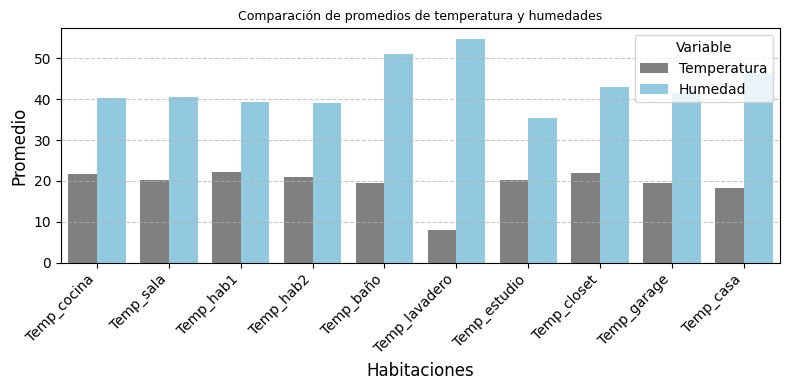

In [24]:
import matplotlib.pyplot as plt   
import seaborn as sns 

# Configurar el gráfico
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=medias.melt(id_vars="Ubicación", var_name="Variable", value_name="Valor"),
                     x="Ubicación", y="Valor", hue="Variable", palette={"Temperatura": "grey", "Humedad": "skyblue"})

    # Personalizar el gráfico
plt.title('Comparación de promedios de temperatura y humedades', fontsize=9)
plt.xlabel('Habitaciones', fontsize=12)
plt.ylabel('Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Variable")
plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
plt.tight_layout()
plt.show()

In [5]:
# Estadísticos de la variable objetivo: consumo de energía
round(df['Hum_casa'].describe(),2)

count    19735.00
mean        46.41
std          6.46
min         27.91
25%         42.03
50%         46.70
75%         51.23
max         62.60
Name: Hum_casa, dtype: float64

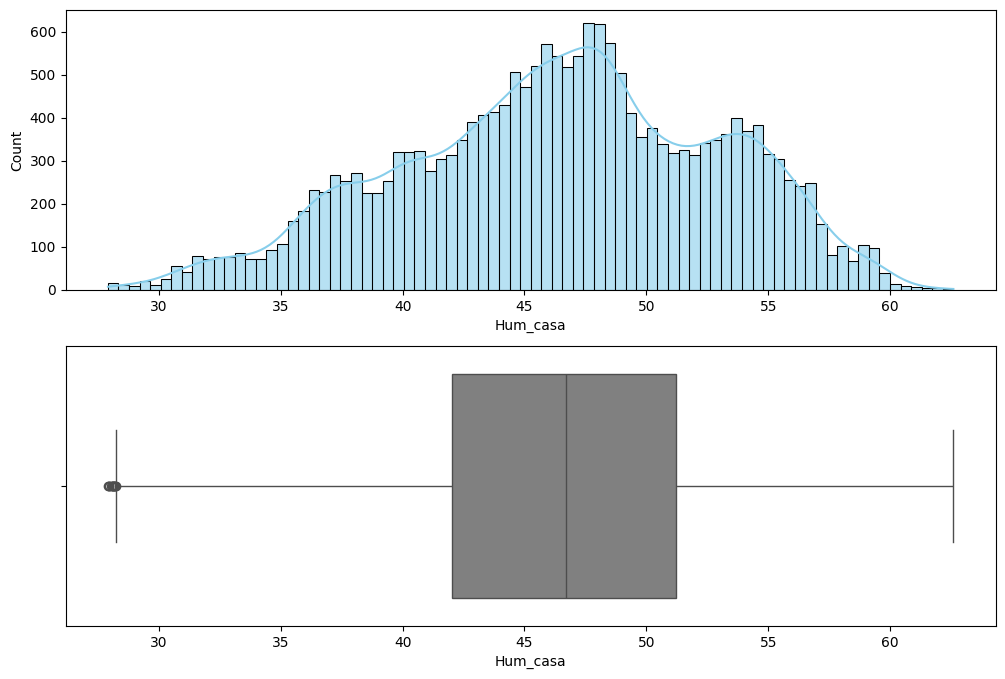

In [26]:
# Gráfico un histograma y un box plot para ver la distribución del consumo de energía en los datos
fig, axis = plt.subplots (2, 1, figsize = (12,8))

sns.histplot(ax = axis[0], data = df, x = 'Hum_casa', color = 'skyblue', bins = 80, kde=True, alpha = 0.6)
sns.boxplot (ax = axis[1], data = df, x = 'Hum_casa', color = 'grey')

plt.show()

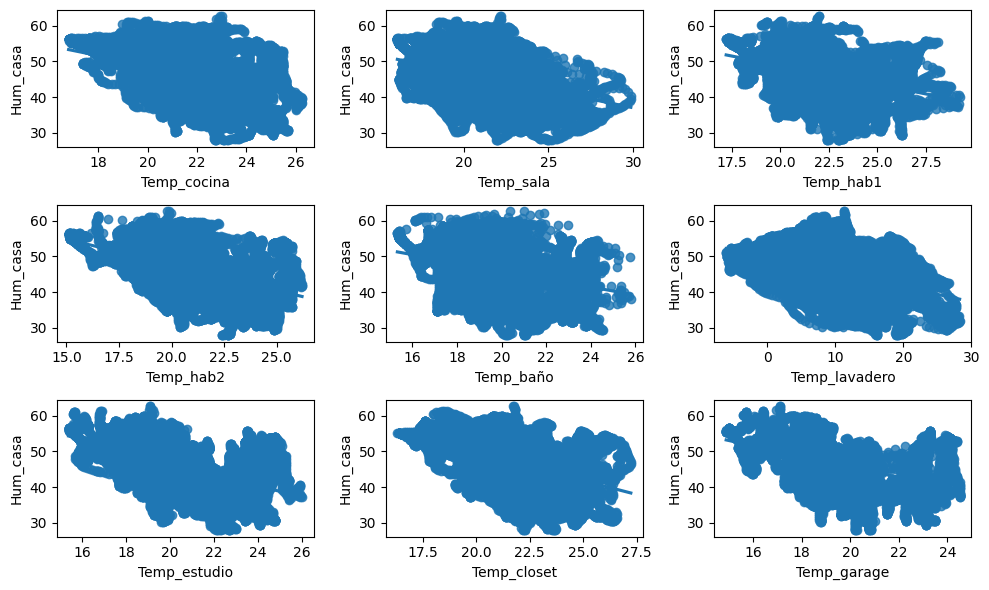

In [27]:
# Hago gráficos de relación para considerar la relación de las temperaturas de cada habitación con el consumo de energía

fig, axis = plt.subplots (3, 3, figsize = (10,6))

sns.regplot(ax = axis[0,0], data = df, x = 'Temp_cocina', y = 'Hum_casa')
sns.regplot(ax = axis[0,1], data = df, x = 'Temp_sala', y = 'Hum_casa')
sns.regplot(ax = axis[0,2], data = df, x = 'Temp_hab1', y = 'Hum_casa')
sns.regplot(ax = axis[1,0], data = df, x = 'Temp_hab2', y = 'Hum_casa')
sns.regplot(ax = axis[1,1], data = df, x = 'Temp_baño', y = 'Hum_casa')
sns.regplot(ax = axis[1,2], data = df, x = 'Temp_lavadero', y = 'Hum_casa')
sns.regplot(ax = axis[2,0], data = df, x = 'Temp_estudio', y = 'Hum_casa')
sns.regplot(ax = axis[2,1], data = df, x = 'Temp_closet', y = 'Hum_casa')
sns.regplot(ax = axis[2,2], data = df, x = 'Temp_garage', y = 'Hum_casa')


plt.tight_layout()
plt.show()

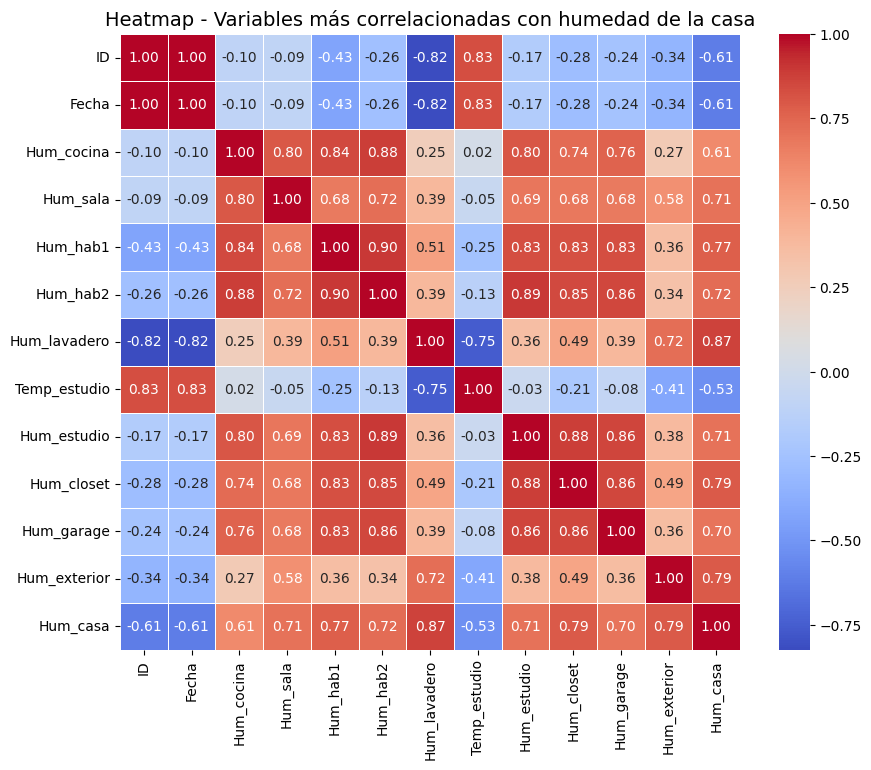

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la correlación de todas las variables con "
correlation = df.corr()["Hum_casa"].abs()

# Seleccionar solo las variables con correlación alta (mayor a 0.5 por ejemplo)
correlacion_fuerte = correlation[correlation > 0.5].index

# Crear un heatmap solo con estas variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[correlacion_fuerte].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Título
plt.title("Heatmap - Variables más correlacionadas con humedad de la casa", fontsize=14)

# Mostrar el gráfico
plt.show()

In [3]:
#Borrar variables no tan relevantes
data=df.drop(["Electrodomesticos", "Luces","Fecha", "ID", 'Temp_cocina',
       'Hum_cocina', 'Temp_sala', 'Hum_sala', 'Temp_hab1', 'Hum_hab1',
       'Temp_hab2', 'Hum_hab2', 'Temp_baño', 'Hum_baño', 'Temp_lavadero',
       'Hum_lavadero', 'Temp_estudio', 'Hum_estudio', 'Temp_closet',
       'Hum_closet', 'Temp_garage', 'Hum_garage',"Variable_aleatoria1","Variable_aleatoria2", "Visibilidad", "Consumo_electrico"], axis = 1)

#Agregar columna con costo de consumo energetico 

data.head()

,Temp_exterior,Presion_exterior,Hum_exterior,Vel_viento,Punto_rocio,Hum_casa,Temp_casa
0,6.600000,733.5,92.0,7.000000,5.3,55.019667,16.110667
1,6.483333,733.6,92.0,6.666667,5.2,54.944500,16.083000
2,6.366667,733.7,92.0,6.333333,5.1,54.766000,16.030000
3,6.250000,733.8,92.0,6.000000,5.0,54.717333,15.985333
4,6.133333,733.9,92.0,5.666667,4.9,54.859667,15.977000


## Entrentamiento de los modelos

In [4]:
# Separación del conjunto de datos

X = data.drop('Hum_casa', axis=1)
y = data['Hum_casa']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15788, 6) (3947, 6) (15788,) (3947,)


### Regresión lineal

In [27]:
from sklearn.linear_model import LinearRegression


model_regresion_lineal = LinearRegression()
model_regresion_lineal.fit(X_train, y_train)

LinearRegression()

In [28]:
#Guardar el modelo
from pickle import dump

dump(model_regresion_lineal, open("../models/LinearRegression_default_42.sav", "wb"))

In [15]:
y_pred_regresion = model_regresion_lineal.predict(X_test)
print(y_pred_regresion)

[46.41035849 49.49534803 43.37455839 ... 33.01571378 50.5305884
 38.29041753]


In [52]:
from sklearn.metrics import mean_squared_error, r2_score


mse = mean_squared_error (y_test, y_pred_regresion)
cd = r2_score(y_test, y_pred_regresion)

print(f"Error cuadrático medio: {mse}")
print(f"Coeficiente de determinación: {cd}")

Error cuadrático medio: 9.917450213738736
Coeficiente de determinación: 0.7645893345870237


In [ ]:
# Mejorar la generalización del modelo y evitar el sobreajuste (overfitting) con técnica Ridge

from sklearn.linear_model import Ridge

# Crear y entrenar el modelo Ridge
ridge = Ridge(alpha=1, max_iter = 300)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluar el rendimiento
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
cd_ridge = r2_score(y_test, y_pred_ridge)
print(f"Error cuadrático medio (MSE): {mse_ridge}")
print(f"Coeficiente de determinación: {cd_ridge}")

Error cuadrático medio (MSE): 9.917458565205306
Coeficiente de determinación: 0.7645891363481356


In [ ]:
# Mejorar la generalización del modelo y evitar el sobreajuste (overfitting) con técnica Lasso

from sklearn.linear_model import Lasso

# Crear y entrenar el modelo Lasso con una penalización alpha=1.0
lasso_model = Lasso(alpha=1.0, max_iter= 300)
lasso_model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred_lasso = lasso_model.predict(X_test)

In [50]:
# Evaluar el rendimiento
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
cd_lasso = r2_score(y_test, y_pred_lasso)
print(f"Error cuadrático medio (MSE): {mse_lasso}")
print(f"Coeficiente de determinación: {cd_lasso}")

Error cuadrático medio (MSE): 12.085141921443984
Coeficiente de determinación: 0.7131348038030765


### Arbol de Decision

In [61]:
from sklearn.model_selection import train_test_split
#
X=data.drop('Hum_casa', axis=1)
y=data['Hum_casa']
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [11]:
y_pred_dt = model_dt.predict(X_test)
print(y_pred_dt)

[46.10870635 56.12329167 42.36566667 ... 34.08919048 53.42193333
 42.405     ]


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
mse_arbol = mean_squared_error(y_test, y_pred_dt)
cd_arbol = r2_score(y_test, y_pred_dt)


print(f"Error cuadrático medio: {mse_arbol}")
print(f"Coeficiente de determinación: {cd_arbol}")

Error cuadrático medio: 2.5445733705628824
Coeficiente de determinación: 0.9395994234963216


In [15]:
# revisión sobreajuste Arbol de decisión
y_train_dt = model_dt.predict(X_train)

mse_arbol_dt = mean_squared_error(y_train, y_train_dt)
cd_arbol_dt = r2_score(y_train, y_train_dt)

print(f"Error cuadrático medio: {mse_arbol_dt}")
print(f"Coeficiente de determinación: {cd_arbol_dt}")

Error cuadrático medio: 3.1978146651979197e-32
Coeficiente de determinación: 1.0


In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [3, 5, 10, 15, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
    'max_features': [None, 'sqrt', 'log2']  # Características máximas a considerar
}

# Crear el modelo
model_decision_tree_grid = DecisionTreeRegressor(random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=model_decision_tree_grid, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Ver el mejor conjunto de parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Ver el mejor modelo
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Mejores parámetros: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [18]:
from sklearn.tree import DecisionTreeRegressor
model_decisiontree_grid=DecisionTreeRegressor(criterion='friedman_mse', max_depth= None, max_features=None, min_samples_leaf=2, min_samples_split=2, random_state=42)
model_decisiontree_grid.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=2,
                      random_state=42)

In [23]:
#Guardar el modelo
from pickle import dump

dump(model_decisiontree_grid, open("../models/DecisionTreeRegressor_default_42.sav", "wb"))

In [19]:
y_pred_decisiontree_grid = model_decisiontree_grid.predict(X_test)
print(y_pred_decisiontree_grid)

[46.07894742 56.37992361 42.35229167 ... 34.35681587 53.41690952
 42.67398095]


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
mse_arbol = mean_squared_error(y_test, y_pred_decisiontree_grid)
cd_arbol = r2_score(y_test, y_pred_decisiontree_grid)


print(f"Error cuadrático medio: {mse_arbol}")
print(f"Coeficiente de determinación: {cd_arbol}")

Error cuadrático medio: 2.3866084148752744
Coeficiente de determinación: 0.9433490400337292


In [22]:
# revisión sobreajuste Arbol de decisión
y_train_decisiontree_grid = model_decisiontree_grid.predict(X_train)

mse_arbol_dt = mean_squared_error(y_train, y_train_decisiontree_grid)
cd_arbol_dt = r2_score(y_train, y_train_decisiontree_grid)

print(f"Error cuadrático medio: {mse_arbol_dt}")
print(f"Coeficiente de determinación: {cd_arbol_dt}")

Error cuadrático medio: 0.13746589939787904
Coeficiente de determinación: 0.9966988685612396


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
model_random_forest = RandomForestRegressor(random_state = 42)
model_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
y_pred_random_forest = model_random_forest.predict(X_test)
print(y_pred_random_forest)

[47.27829353 53.47676746 42.4852694  ... 33.66795337 53.45200214
 42.66620952]


In [43]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_random_forest)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_random_forest)}")

Error cuadrático medio: 1.0445763832621007
Coeficiente de determinación: 0.9752048746241491


In [44]:
# revisión sobreajuste Random Forest
y_train_random_forest = model_random_forest.predict(X_train)
print(f"Error cuadrático medio: {mean_squared_error(y_train, y_train_random_forest)}")
print(f"Coeficiente de determinación: {r2_score(y_train, y_train_random_forest)}")

Error cuadrático medio: 0.12252524529795751
Coeficiente de determinación: 0.9970576561818854


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

## Optimización

rf_random = {"n_estimators": np.arange(100, 500, 100),
           "max_depth": [None,5,10,15,20],
           "min_samples_split": np.arange(2,20, 2),
           "min_samples_leaf": np.arange(2, 20, 2),
           "max_features": [1,3,5,10,"sqrt","auto"]}

In [ ]:
### RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_random,
                              scoring    = "r2",
                              n_iter= 20,
                              cv=5,
                              verbose=True)

## Entrenamiento
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.loca

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': [1, 3, 5, 10, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400])},
                   scoring='r2', verbose=True)

In [82]:
# Mejores parámetros

rs_model.best_params_

{'n_estimators': np.int64(400),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(4),
 'max_features': 3,
 'max_depth': None}

In [83]:
### Entrenamiento del mejor modelo

rs_model_best = RandomForestRegressor(**rs_model.best_params_)
rs_model_best.fit(X_train, y_train)

RandomForestRegressor(max_features=3, min_samples_leaf=np.int64(4),
                      min_samples_split=np.int64(8),
                      n_estimators=np.int64(400))

In [86]:
y_pred_rs = rs_model_best.predict(X_test)
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_rs)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_rs)}")

Error cuadrático medio: 1.5218435009128042
Coeficiente de determinación: 0.9638759778488226


In [85]:
y_train_rs = rs_model_best.predict(X_train)
print(f"Error cuadrático medio: {mean_squared_error(y_train, y_train_rs)}")
print(f"Coeficiente de determinación: {r2_score(y_train, y_train_rs)}")

Error cuadrático medio: 0.564878732464162
Coeficiente de determinación: 0.9864348980293118


In [87]:
# Importar libreria

from sklearn.model_selection import GridSearchCV

## Optimización

rf_grid = {"n_estimators": [300,400,500],
           "max_depth": [None],
           "min_samples_split": [7,8,9],
           "min_samples_leaf": [3,4,5],
           "max_features": [2,3,4]}

### RandomizedSearchCV

gd_model = GridSearchCV(RandomForestRegressor(),
                              param_grid=rf_grid,
                              scoring = "r2",
                              n_jobs= -1,
                              cv=5,
                              verbose=True)

## Entrenamiento
gd_model.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [300, 400, 500]},
             scoring='r2', verbose=True)

In [ ]:
# Mejores parámetros
gd_model.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 500}

In [35]:
from sklearn.ensemble import RandomForestRegressor
gd_model_best = RandomForestRegressor(max_features=4, min_samples_leaf=3, min_samples_split=7,
                      n_estimators=500)
gd_model_best.fit(X_train, y_train)

RandomForestRegressor(max_features=4, min_samples_leaf=3, min_samples_split=7,
                      n_estimators=500)

In [ ]:
from joblib import dump


dump(gd_model_best, "../models/RandomForestRegressor_default_42_compressed.joblib", compress=3)

['../models/RandomForestRegressor_default_42_compressed.joblib']

In [92]:
## Predicción

y_pred_gd = gd_model_best.predict(X_test)
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_gd)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_gd)}")

Error cuadrático medio: 1.243424045095759
Coeficiente de determinación: 0.9704848246738879


In [93]:
## Sobreajuste
y_pred_gd_train = gd_model_best.predict(X_train)
print(f"Error cuadrático medio: {mean_squared_error(y_train, y_pred_gd_train)}")
print(f"Coeficiente de determinación: {r2_score(y_train, y_pred_gd_train)}")

Error cuadrático medio: 0.3666264547245943
Coeficiente de determinación: 0.9911957647585776


In [94]:
gd_model_best.feature_importances_

array([0.00976221, 0.00545302, 0.0648947 , 0.08202036, 0.48453614,
       0.0592129 , 0.01891229, 0.11571723, 0.15949115])

In [ ]:
# Caracteristicas más importantes
df = (pd.DataFrame({"Caracteristicas": X_train.columns,
                        "valores": gd_model_best.feature_importances_})
          .sort_values("valores", ascending=False))

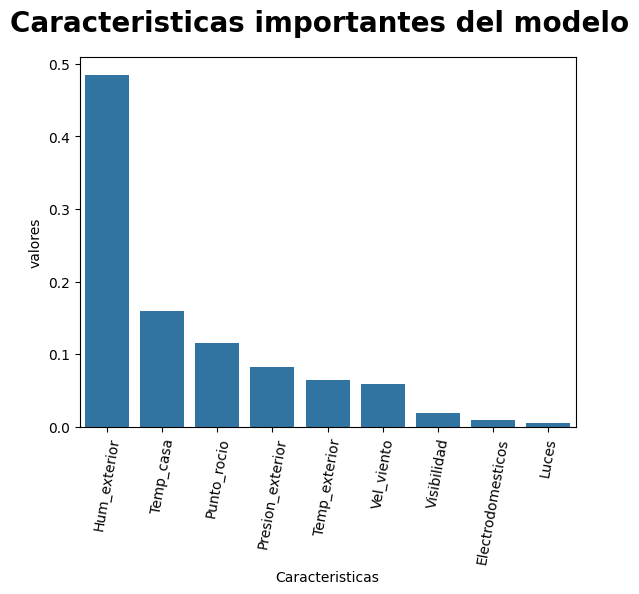

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = 'Caracteristicas',y = 'valores',data = df, legend=False)
plt.suptitle('Caracteristicas importantes del modelo' , fontweight = 'black', fontsize=20)
plt.xticks(rotation=80);

# Se realizó un despligue del modelo de predicción en Render con streamlit
Se adjunta el link para el sitio web
https://proyecto-final-sssj.onrender.com/